# Analyse de données sous `Python` - *correction*


In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white") # change le style par défaut des graphiques seaborn

%matplotlib inline

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## A faire

### Températures mondiales (anomalies)

Nous allons travailler ici sur les données de température mondiale HadCRUT4, fournies par [Climate Research Unit](https://crudata.uea.ac.uk/). Vous trouverez plus d’informations sur ces données sur ce [lien](https://crudata.uea.ac.uk/cru/data/temperature/). Nous avons ici plus exactement l'historique des anomalies moyennes mensuelles et annuelles depuis 1850, au niveau mondial, par rapport à la période de référence 1961-1990.

Le code ci-dessous télécharge directement les dernières données disponibles et les met dans un DataFrame dont vous avez un aperçu en dessous.

> **ATTENTION** Nouvelle version des données par rapport au sujet de TP, pour information. On supprime la dernière ligne (année 2023, forcément incomplète).

In [3]:
had = pandas.read_csv("https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT5.0Analysis_gl.txt", header=None)
donnees = pandas.DataFrame(
    [list(map(lambda v: float(v), filter(lambda v: v!= "", h.split(" ")))) for h in had[0][::2]],
    columns = ["Year", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Annual"]
)[:-1]
donnees.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
168,2018.0,0.711,0.796,0.790,0.822,0.713,0.738,0.733,0.735,0.676,0.869,0.745,0.824,0.763
169,2019.0,0.800,0.844,1.076,0.939,0.778,0.809,0.857,0.858,0.803,0.956,0.937,1.037,0.891
170,2020.0,1.069,1.113,1.094,1.063,0.908,0.825,0.816,0.801,0.867,0.811,1.013,0.693,0.923
171,2021.0,0.701,0.565,0.726,0.760,0.706,0.713,0.792,0.799,0.867,0.907,0.854,0.751,0.762
172,2022.0,0.779,0.764,0.890,0.770,0.761,0.858,0.778,0.853,0.790,0.929,0.675,0.768,0.801


## Décrire les données (statistiques de base sur chaque mois et sur l'année, corrélations entre les variables)

In [4]:
donnees.drop(columns = "Year").describe().round(2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
count,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00
mean,-0.10,-0.10,-0.12,-0.09,-0.09,-0.07,-0.04,-0.03,-0.05,-0.04,-0.08,-0.12,-0.08
std,0.42,0.43,0.44,0.40,0.37,0.35,0.34,0.35,0.35,0.37,0.40,0.41,0.37
min,-1.04,-0.84,-0.84,-0.66,-0.66,-0.64,-0.59,-0.60,-0.64,-0.68,-0.68,-0.90,-0.60
25%,-0.39,-0.41,-0.43,-0.39,-0.36,-0.31,-0.29,-0.27,-0.31,-0.33,-0.39,-0.42,-0.34
50%,-0.18,-0.22,-0.21,-0.18,-0.17,-0.15,-0.13,-0.11,-0.13,-0.10,-0.14,-0.21,-0.18
75%,0.12,0.12,0.10,0.15,0.12,0.09,0.08,0.12,0.12,0.11,0.06,0.11,0.08
max,1.09,1.22,1.18,1.06,0.91,0.86,0.86,0.95,0.87,1.01,1.01,1.04,0.93


<AxesSubplot:>

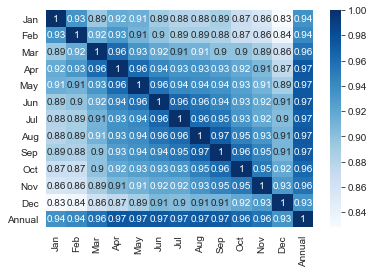

In [5]:
seaborn.heatmap(donnees.drop(columns = "Year").corr(), annot = True, cmap = "Blues")
plt.show()

<AxesSubplot:>

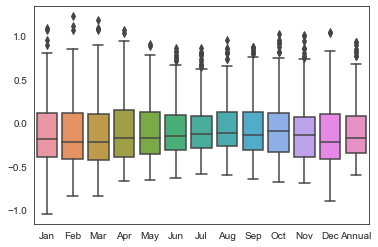

In [6]:
seaborn.boxplot(data = donnees.drop(columns = "Year"))
plt.show()

## Réprésenter l'évolution des anomalies annuelles sur un graphique

<AxesSubplot:xlabel='Year', ylabel='Annual'>

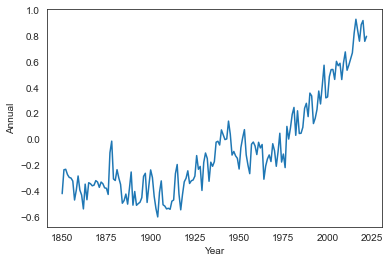

In [7]:
seaborn.lineplot(data = donnees, x = "Year", y = "Annual")
plt.show()

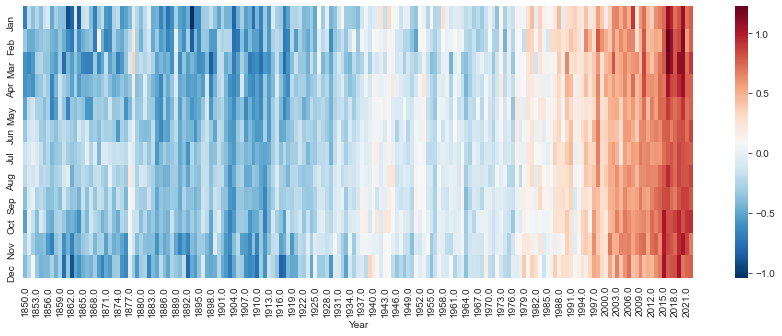

In [49]:
plt.figure(figsize = (15, 5))
seaborn.heatmap(donnees.set_index(donnees.Year).drop(columns = ["Annual", "Year"]).transpose(),
                cmap = "RdBu_r")
plt.show()

## Réaliser une ACP sur les données mensuelles

In [41]:
donnees_mens = donnees.drop(columns = ["Year", "Annual"])
pca = PCA()
pca.fit(donnees_mens)

PCA()

In [42]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(donnees_mens.shape[1])], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,1.648874,92.0,92.0
1,Dim2,0.050973,3.0,95.0
2,Dim3,0.021838,1.0,96.0
3,Dim4,0.018142,1.0,97.0
4,Dim5,0.013200,1.0,98.0
5,Dim6,0.011588,1.0,98.0
6,Dim7,0.007999,0.0,99.0
7,Dim8,0.006681,0.0,99.0
8,Dim9,0.005121,0.0,99.0
9,Dim10,0.004308,0.0,100.0


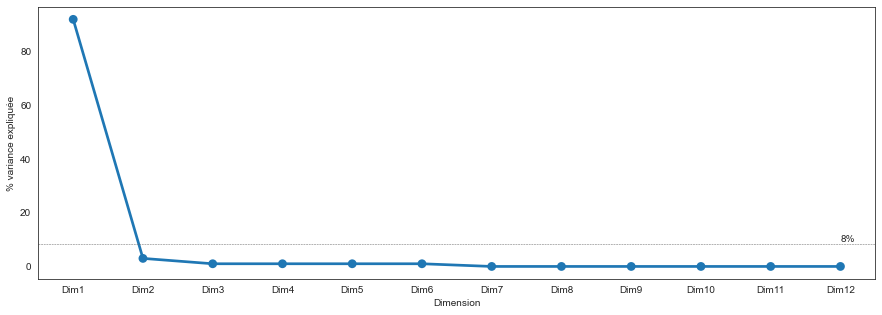

In [43]:
plt.figure(figsize = (15, 5)) # modifie la taille du graphique
seaborn.pointplot(data = eig, x = "Dimension", y = "% variance expliquée")
seuil = 100 / donnees_mens.shape[1]
plt.text(donnees_mens.shape[1] - 1, seuil + 1, str(round(seuil)) + "%")
plt.axhline(y = seuil, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show() # cette ligne supprime l'affichage inutile en amont du graphique

In [44]:
donnees_pca = pca.transform(donnees_mens)
donnees_pca_df = pandas.DataFrame({
    "Dim1" : donnees_pca[:,0], 
    "Dim2" : donnees_pca[:,1],
    "Year" : donnees["Year"]
})
donnees_pca_df.head()


,Dim1,Dim2,Year
0,-1.189278,0.154328,1850.0
1,-0.568105,0.373319,1851.0
2,-0.559217,0.472526,1852.0
3,-0.674091,-0.047255,1853.0
4,-0.740194,-0.029916,1854.0


## Produire les graphiques nécessaires à l’interprétation

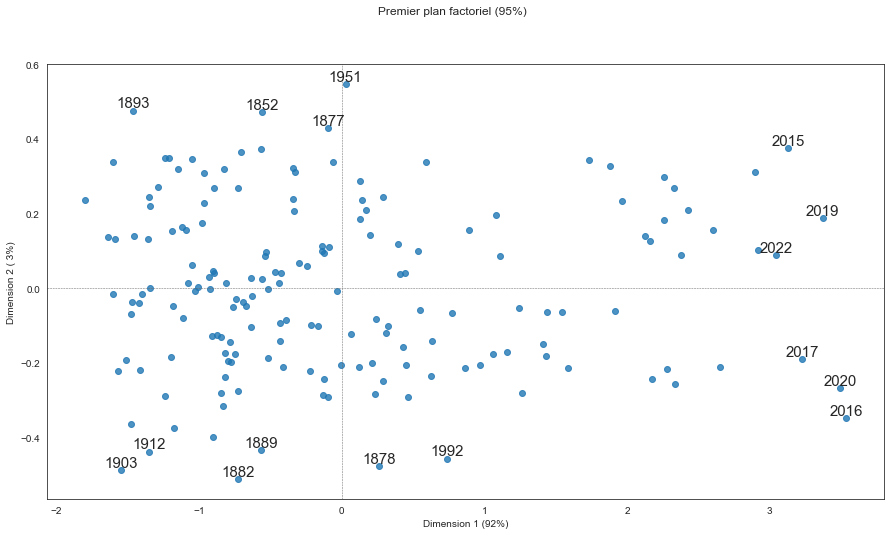

In [45]:
fig, ax = plt.subplots(figsize=(15,8))
plt.axvline(x = 0, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 0, linewidth = .5, color = "dimgray", linestyle = "--")

seaborn.regplot(data = donnees_pca_df, x = "Dim1", y = "Dim2", fit_reg = False, ax = ax)

for k in donnees_pca_df.iterrows():
    if (abs(k[1]['Dim1']) > 3) | (abs(k[1]['Dim2']) > .4):
        ax.annotate(round(k[1]["Year"]), (k[1]['Dim1'], k[1]['Dim2']), fontsize = 15, ha = "center", va = "bottom")
plt.xlabel("Dimension 1 (92%)") 
plt.ylabel("Dimension 2 ( 3%)")
plt.suptitle("Premier plan factoriel (95%)")
plt.show()

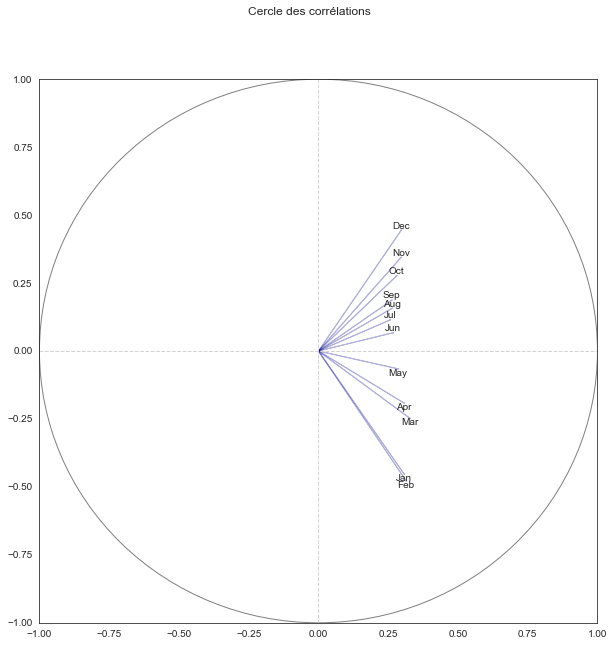

In [47]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)

for j in range(donnees_mens.shape[1]):
    axes.arrow(0, 0, pca.components_[0, j], pca.components_[1, j], width = .001, color = "darkblue", alpha = .25)
    if (pca.components_[1, j] > 0):
        va = "bottom"
    else:
        va = "top"
    axes.text(pca.components_[0, j], pca.components_[1, j], donnees_mens.columns.values[j], ha = "center", va = va)

    # Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0), 1, color = 'gray', fill = False))

plt.show()

## Identifier des années particulières

Voir le graphique des individus (années)

## Que peut-on dire globalement ?

Ca se réchauffe...